In [11]:
import pandas as pd
# Need to change to run the processed data at some point
# Load the dataset 
raw_data_url = "https://raw.githubusercontent.com/eeberman/machine_learning_intro/master/Ames-Housing-Analysis/Data/AmesHousing.csv"
df = pd.read_csv(r"C:\Users\elieberm1\Documents\Python Scripts\machine_learning_self\Ames-Housing-Analysis\Data\Raw\AmesHousing.csv")
print(df.head())


   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

In [12]:
# Describe the dataset
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [13]:
# Define the square footage features relevant to living space
square_footage_features = [
    'Gr Liv Area',  # Above ground living area
    'Total Bsmt SF',  # Total basement area
    '1st Flr SF',  # First floor area
    '2nd Flr SF',  # Second floor area, if applicable
    'BsmtFin SF 1',  # Finished basement area 1
    'BsmtFin SF 2',  # Finished basement area 2
    'Bsmt Unf SF',  # Unfinished basement area
    'Low Qual Fin SF'  # Low quality finished area
]

# Calculate the total square footage for living space
df['square_footage_total'] = df[square_footage_features].sum(axis=1)

# Print the selected feature names
print("Features included in square_footage_total:")
print(square_footage_features)

# Print the first few rows of the calculated total square footage
print(df[['square_footage_total']].head(10))
# Check and redescribe the dataset with square_footage_total included
df.describe()


Features included in square_footage_total:
['Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Low Qual Fin SF']
   square_footage_total
0                5472.0
1                3556.0
2                5316.0
3                8440.0
4                5114.0
5                5060.0
6                5352.0
7                5120.0
8                6422.0
9                5596.0


,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,square_footage_total
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068,5101.892150
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357,1610.506496
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000,668.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000,4008.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000,4904.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000,5989.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000,23504.000000


In [14]:
# list the features, number of entires, and datatypes of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 83 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order                 2930 non-null   int64  
 1   PID                   2930 non-null   int64  
 2   MS SubClass           2930 non-null   int64  
 3   MS Zoning             2930 non-null   object 
 4   Lot Frontage          2440 non-null   float64
 5   Lot Area              2930 non-null   int64  
 6   Street                2930 non-null   object 
 7   Alley                 198 non-null    object 
 8   Lot Shape             2930 non-null   object 
 9   Land Contour          2930 non-null   object 
 10  Utilities             2930 non-null   object 
 11  Lot Config            2930 non-null   object 
 12  Land Slope            2930 non-null   object 
 13  Neighborhood          2930 non-null   object 
 14  Condition 1           2930 non-null   object 
 15  Condition 2          

In [15]:
# Used to view the values of various features
print(df['Neighborhood'].unique())

['NAmes' 'Gilbert' 'StoneBr' 'NWAmes' 'Somerst' 'BrDale' 'NPkVill'
 'NridgHt' 'Blmngtn' 'NoRidge' 'SawyerW' 'Sawyer' 'Greens' 'BrkSide'
 'OldTown' 'IDOTRR' 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor'
 'Blueste' 'Mitchel' 'Timber' 'MeadowV' 'Veenker' 'GrnHill' 'Landmrk']


In [16]:
# Sort and print the SalePrice values
sorted_prices = df['SalePrice'].sort_values(ascending=False)
print(sorted_prices)

1767    755000
1760    745000
2445    625000
1063    615000
44      611657
         ...  
2880     35311
2843     35000
726      34900
1553     13100
181      12789
Name: SalePrice, Length: 2930, dtype: int64


In [17]:
# Find null datapoints
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0]
null_counts = null_counts.sort_values(ascending=False)
print(null_counts)


Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Qual        159
Garage Finish      159
Garage Yr Blt      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
Bsmt Qual           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Half Bath       2
Bsmt Full Bath       2
BsmtFin SF 1         1
Garage Cars          1
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Electrical           1
dtype: int64


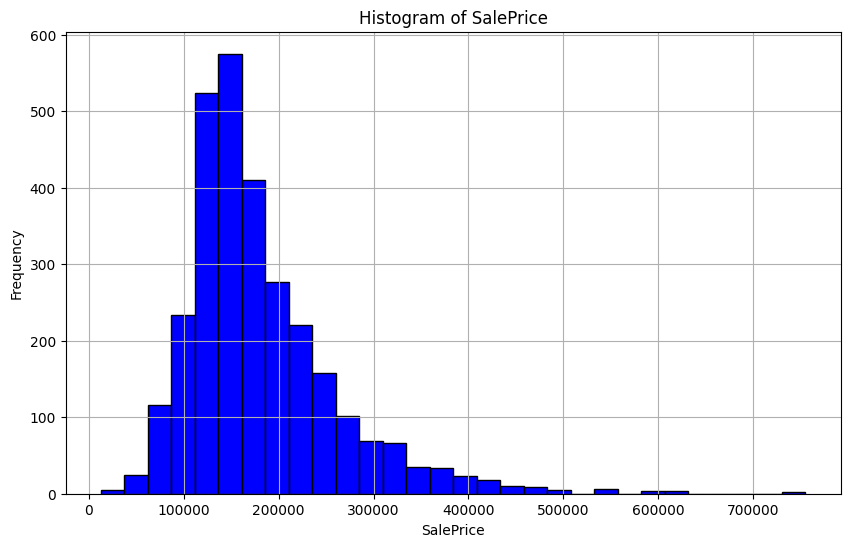

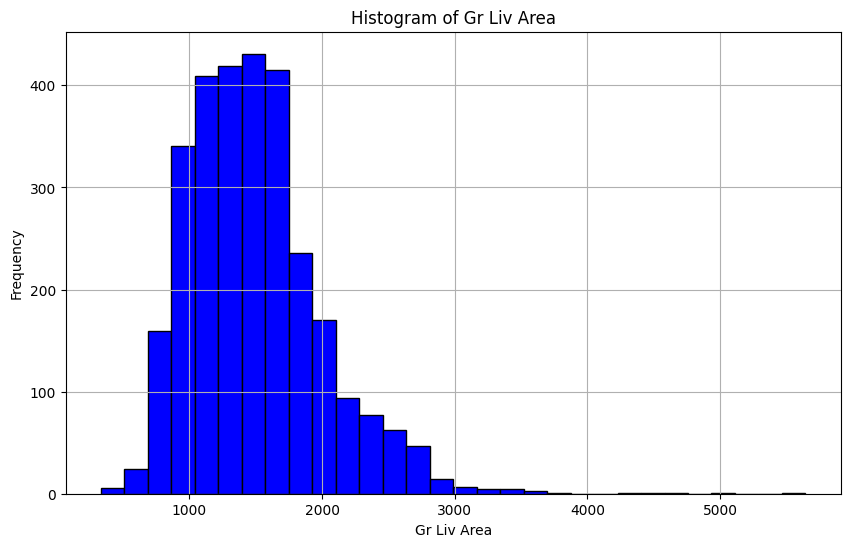

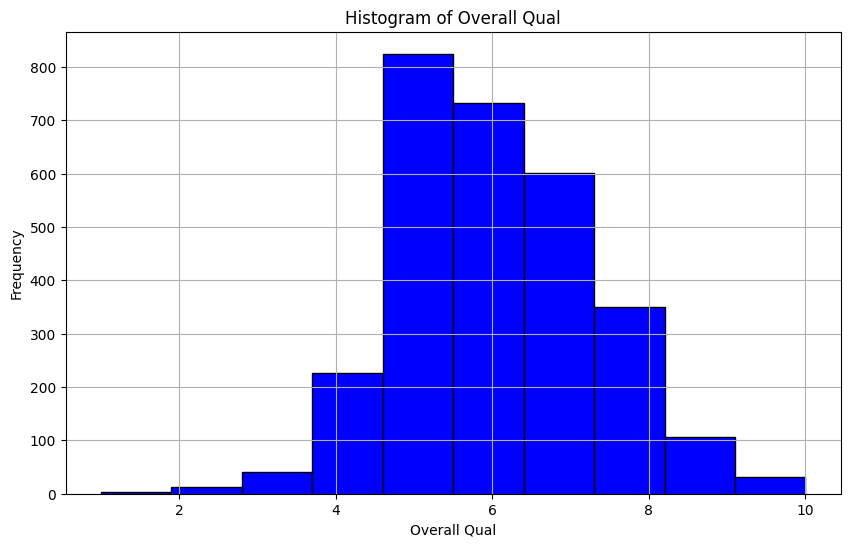

In [18]:
# Histogram of important features to see distribution with relatively raw dataset
import matplotlib.pyplot as plt
def plot_histogram(data, feature, bins=30):
    plt.figure(figsize=(10,6))
    plt.hist(data[feature], bins=bins, color='blue', edgecolor = 'black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
# Example histrograms for 'SalePrice', 'Overall Qual', and 'Gr Liv Area'
plot_histogram(df, 'SalePrice')

plot_histogram(df, 'Gr Liv Area')

# Example usage for 'Overall Qual'
plot_histogram(df, 'Overall Qual', bins=10) 


In [19]:
from importnb import Notebook

with Notebook():
    import _02_Feature_Engineering

# Now you can access variables and functions from file_a
print(_02_Feature_Engineering.df_combined.head())

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

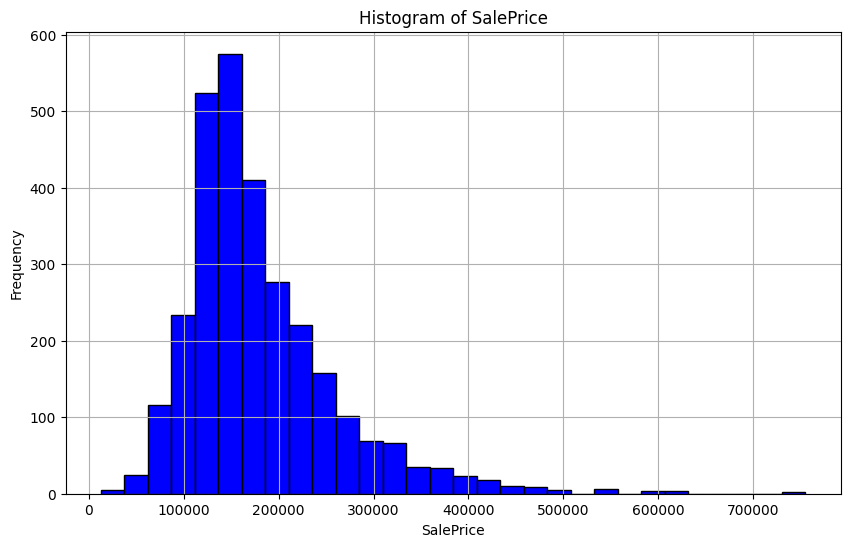

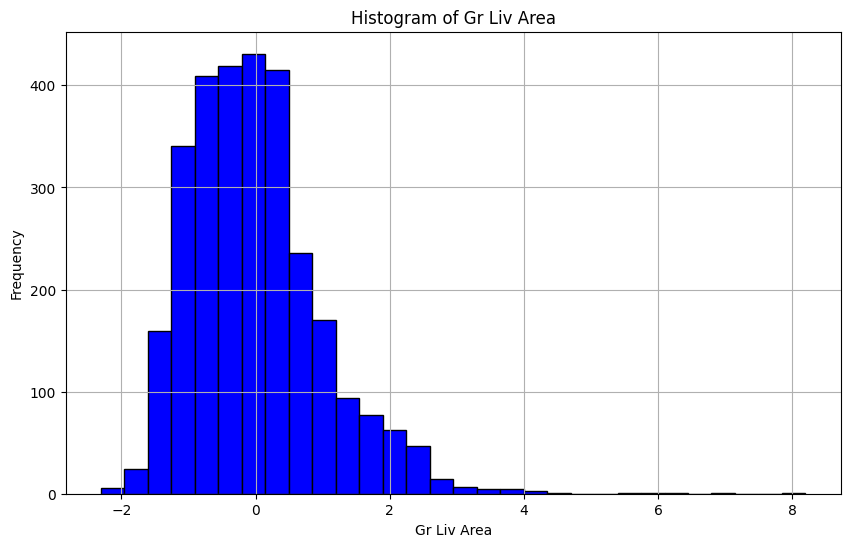

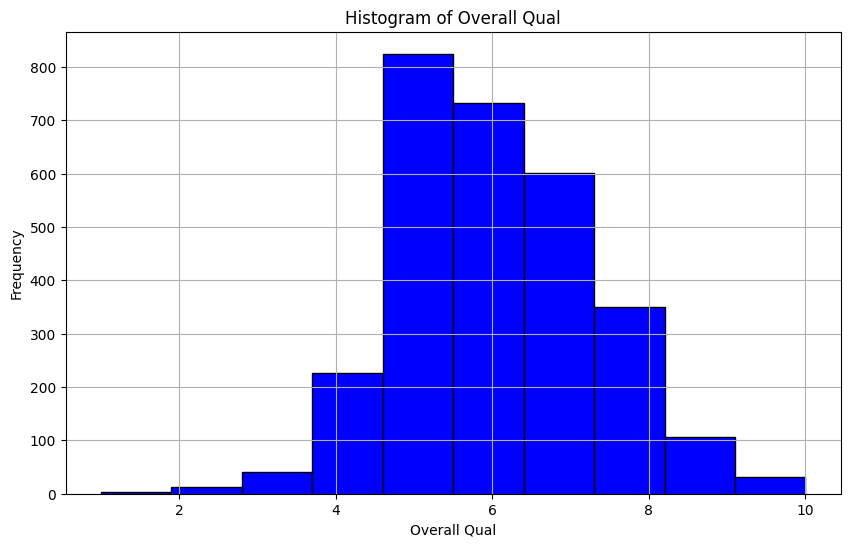

In [20]:
# Histogram of important features to see distribution with processed dataset

def plot_histogram(data, feature, bins=30):
    plt.figure(figsize=(10,6))
    plt.hist(data[feature], bins=bins, color='blue', edgecolor = 'black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
# Example histrograms for 'SalePrice', 'Overall Qual', and 'Gr Liv Area'
plot_histogram(_02_Feature_Engineering.df_combined, 'SalePrice')

plot_histogram(_02_Feature_Engineering.df_combined, 'Gr Liv Area')

# Example usage for 'Overall Qual'
plot_histogram(_02_Feature_Engineering.df_combined, 'Overall Qual', bins=10) 


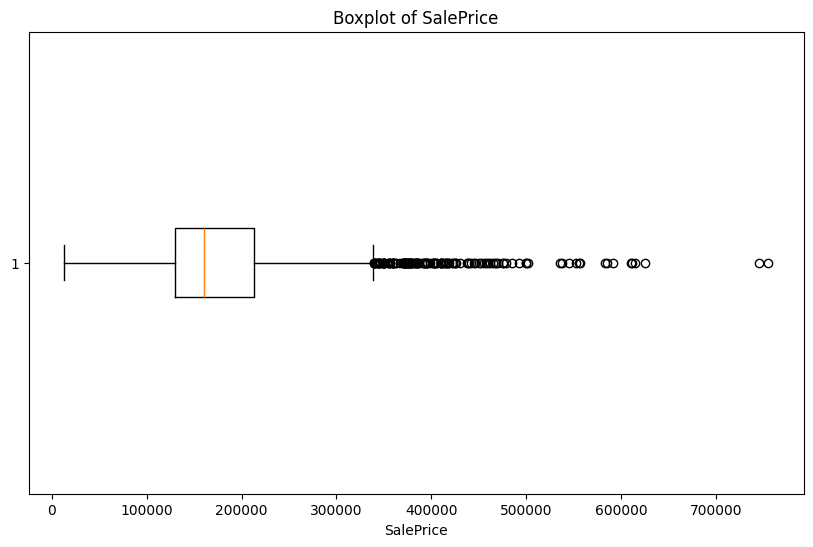

In [21]:
# Plot a boxplot to identify the outliers
plt.figure(figsize=(10,6))
plt.boxplot(_02_Feature_Engineering.df_combined['SalePrice'], vert=False)
plt.title('Boxplot of SalePrice')
plt.xlabel('SalePrice')
plt.show()

In [28]:
import numpy as np

# Define a threshold for the top 1% of SalePrice to find outliers
sp_threshold = np.percentile(_02_Feature_Engineering.df_combined['SalePrice'], 99)

# Identify outliers
sp_outliers = _02_Feature_Engineering.df_combined[_02_Feature_Engineering.df_combined['SalePrice'] > sp_threshold]

# Print the number of outliers and a summary of their SalePrice
print(f'Number of outliers: {len(sp_outliers)}')
print(sp_outliers['SalePrice'].describe())    

Number of outliers: 30
count        30.000000
mean     538643.400000
std       78966.134113
min      457347.000000
25%      475000.000000
50%      518418.500000
75%      584108.250000
max      755000.000000
Name: SalePrice, dtype: float64


In [29]:
# Exampine the features of the outliers
# Proof that there are only 11 outliers
sp_outlier_features = sp_outliers.describe(include='all')
print(sp_outlier_features)

         Lot Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
count   30.000000     30.000000     30.000000    30.000000      30.000000   
unique        NaN           NaN           NaN          NaN            NaN   
top           NaN           NaN           NaN          NaN            NaN   
freq          NaN           NaN           NaN          NaN            NaN   
mean     1.045139      1.948288      0.086778     0.411765       2.458541   
std      1.322243      1.601084      1.593461     1.261445       1.051469   
min      0.124396     -0.971717     -0.293973    -1.163496       0.125722   
25%      0.445009      1.502966     -0.293973    -0.583185       1.686307   
50%      0.632794      2.072104     -0.293973     0.061985       2.484192   
75%      0.917645      3.157693     -0.293973     1.179369       3.250297   
max      5.502967      4.051191      7.941828     3.110328       4.636097   

        1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Garage Area  

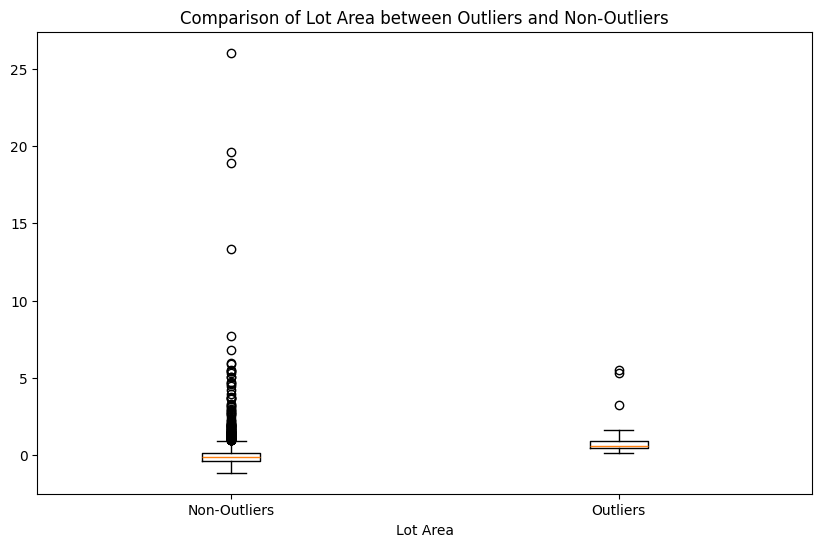

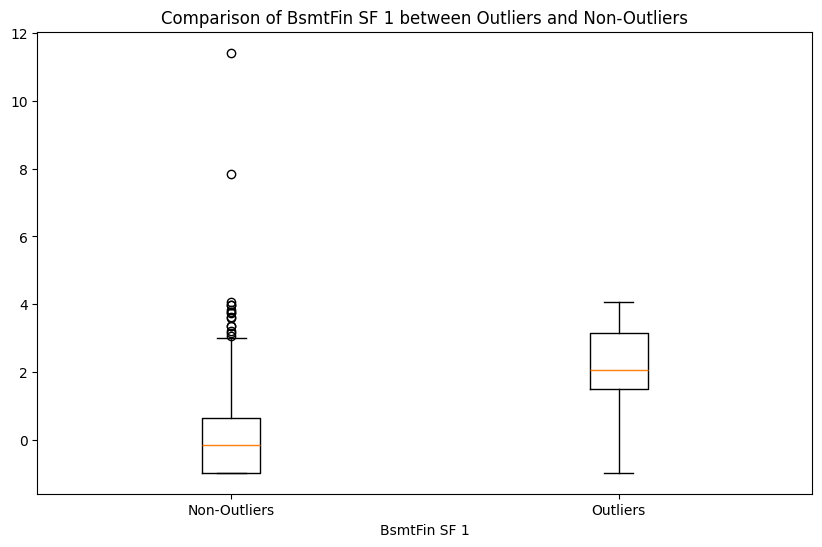

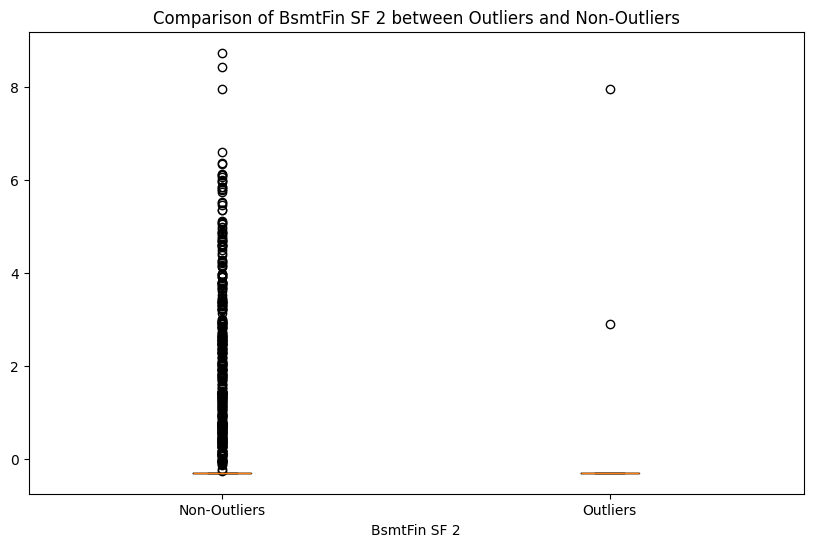

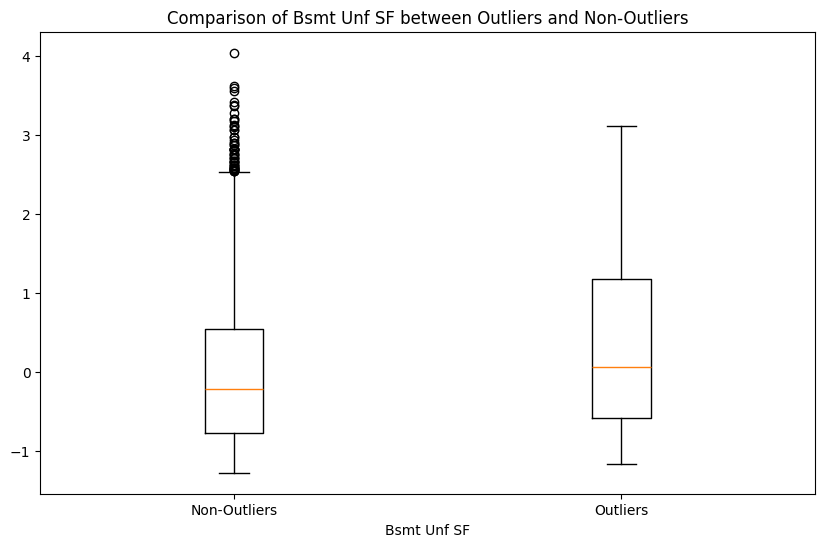

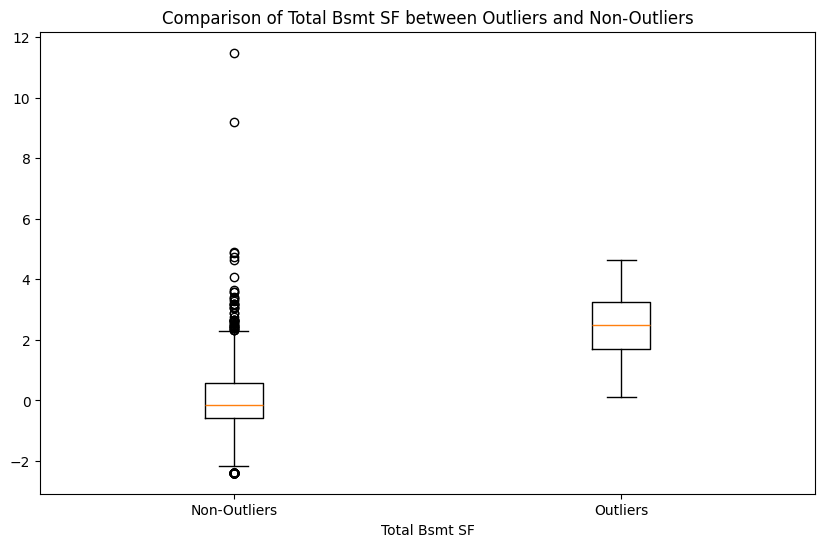

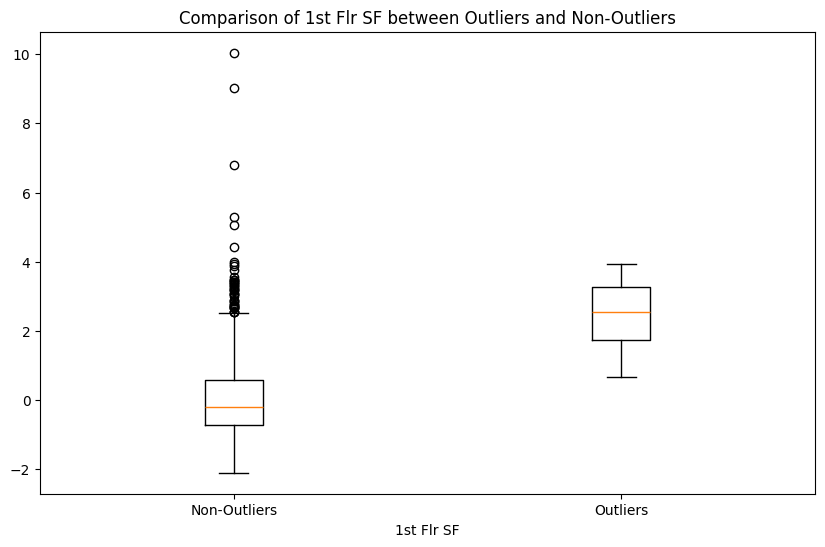

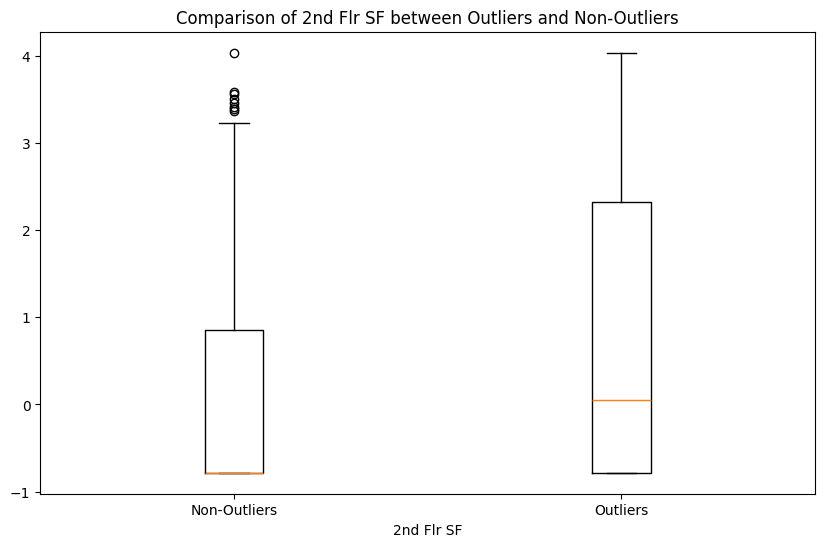

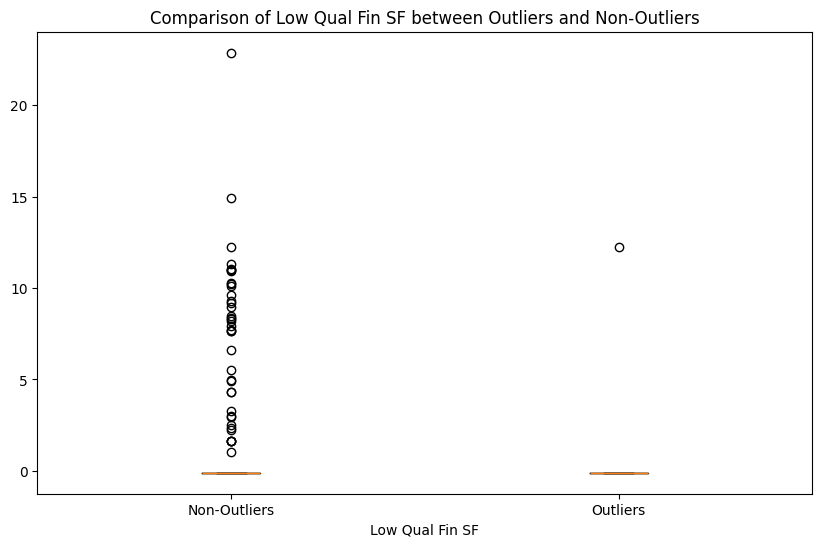

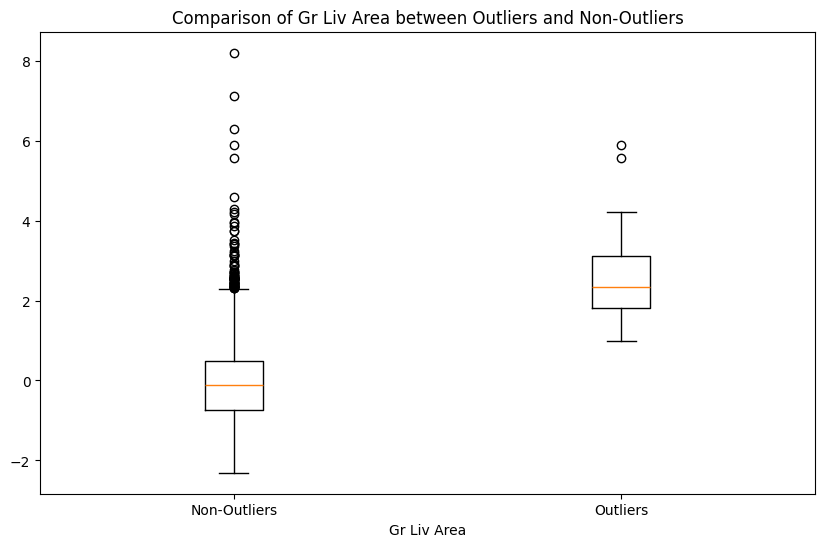

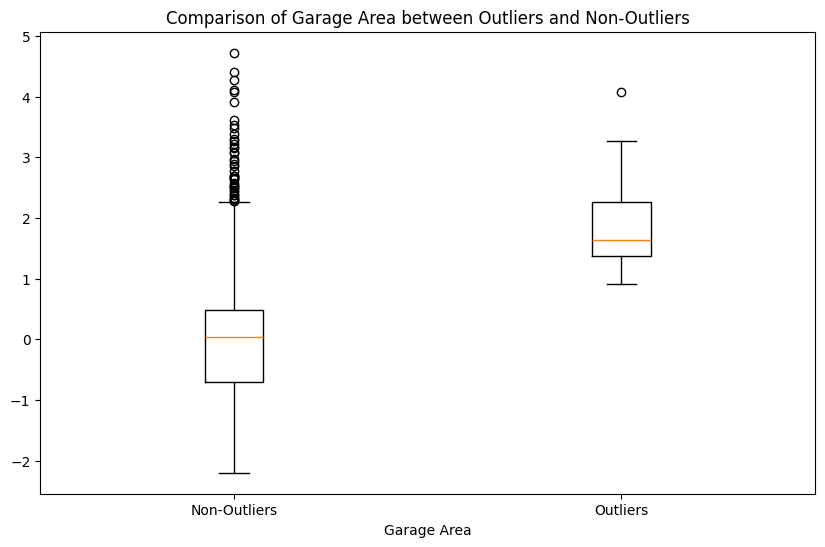

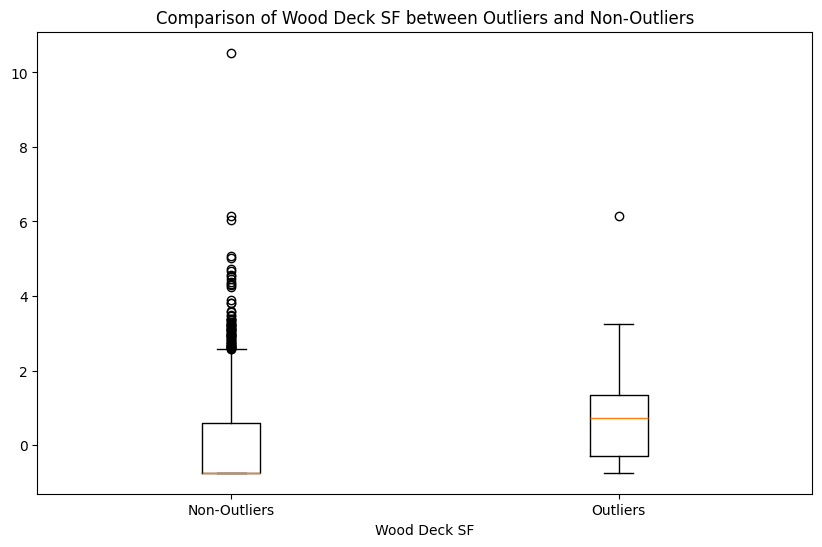

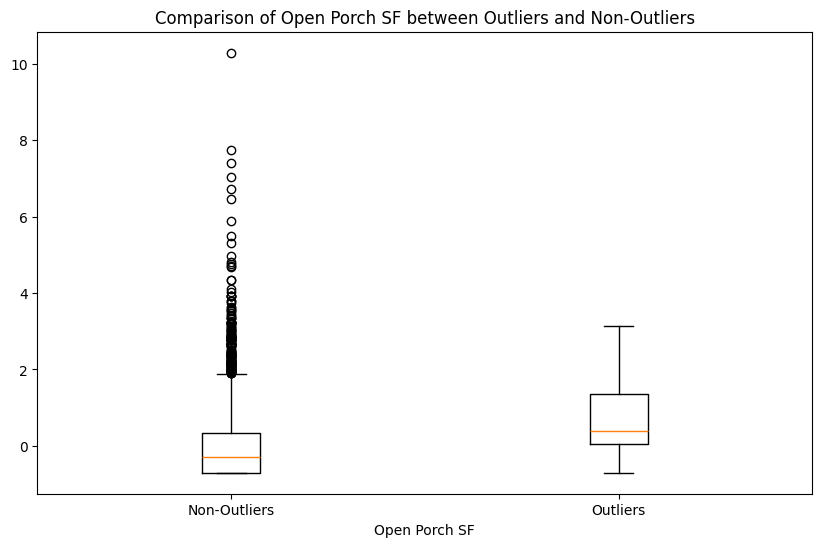

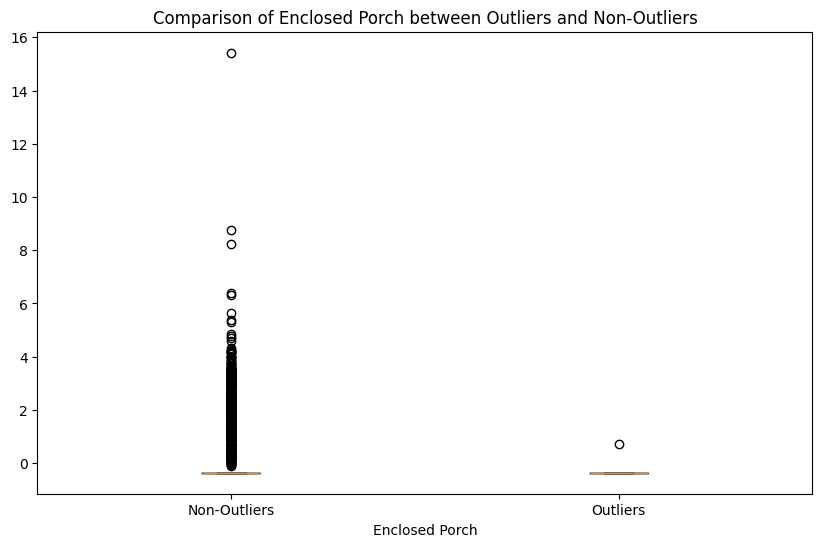

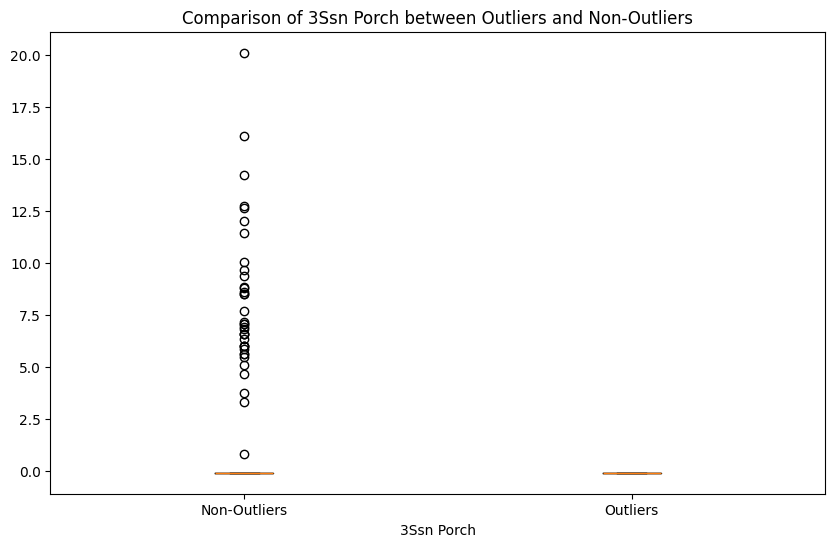

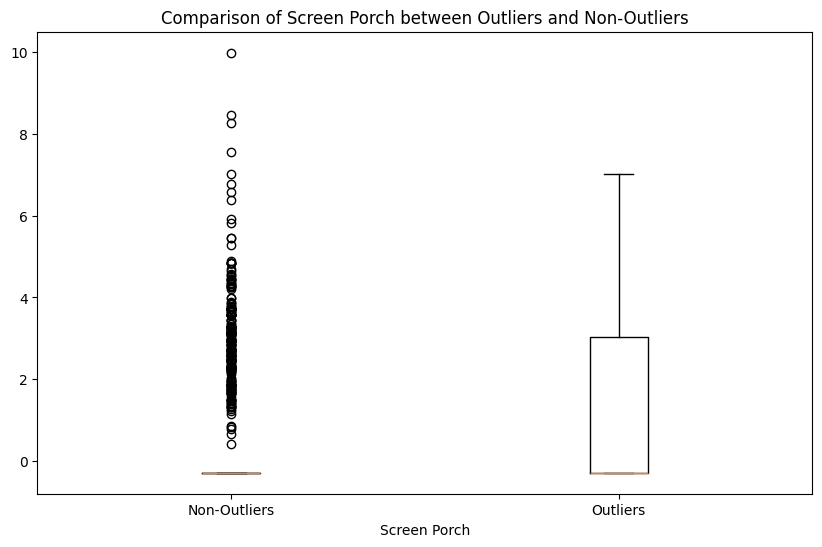

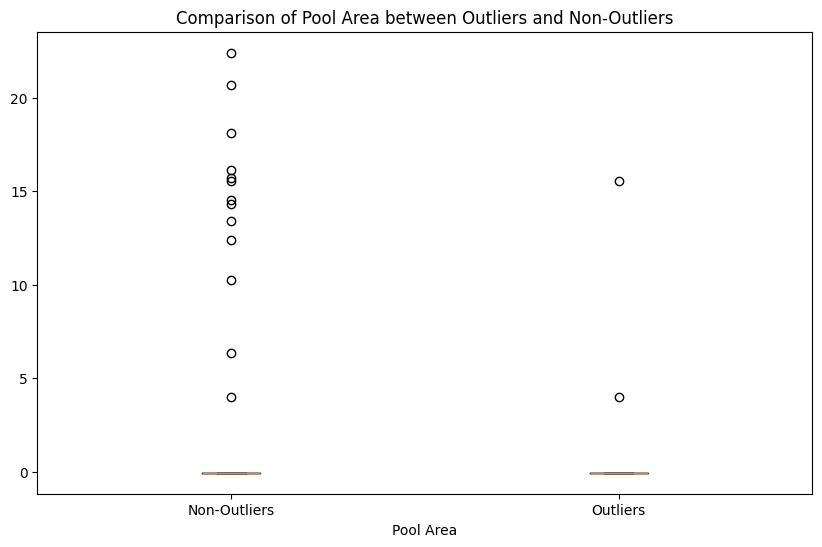

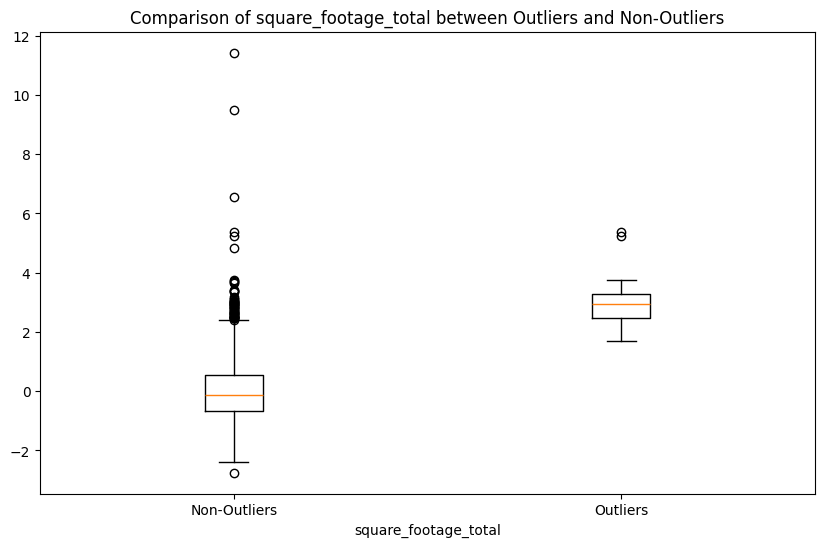

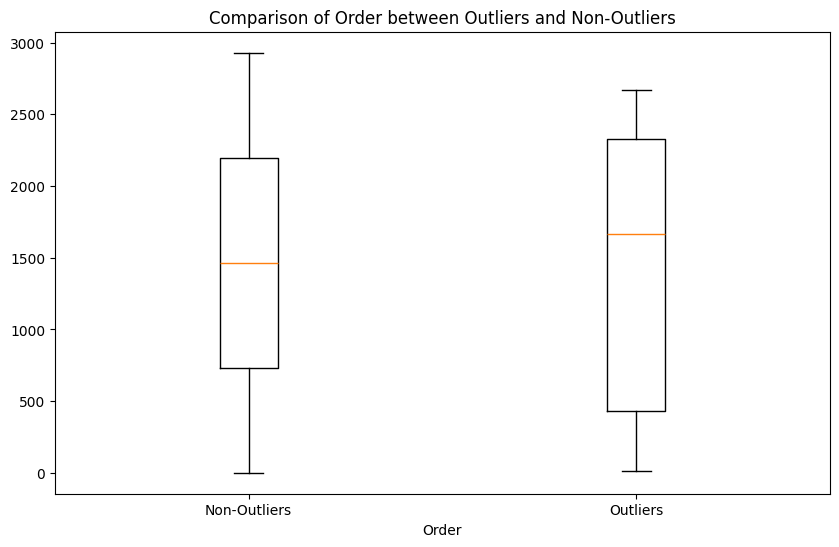

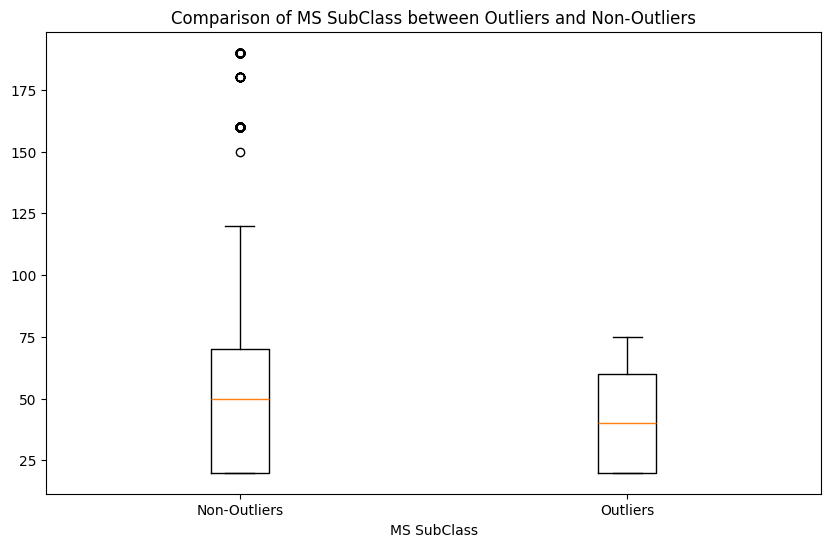

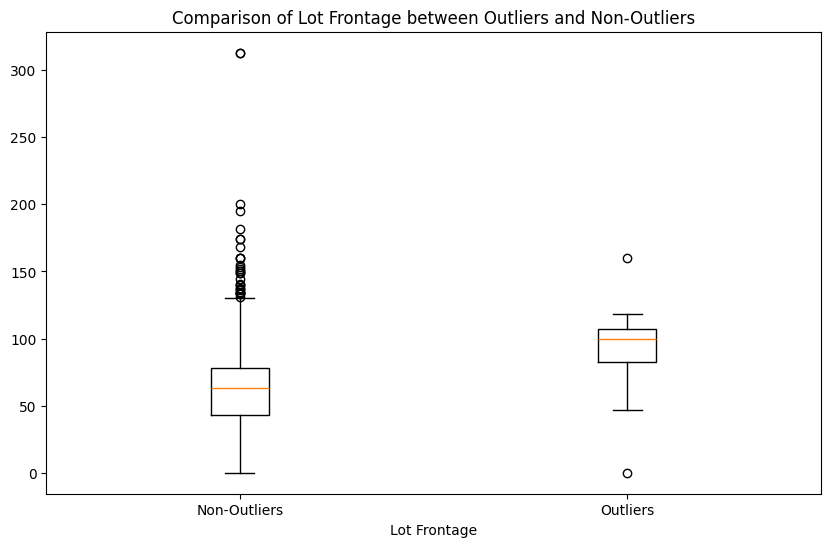

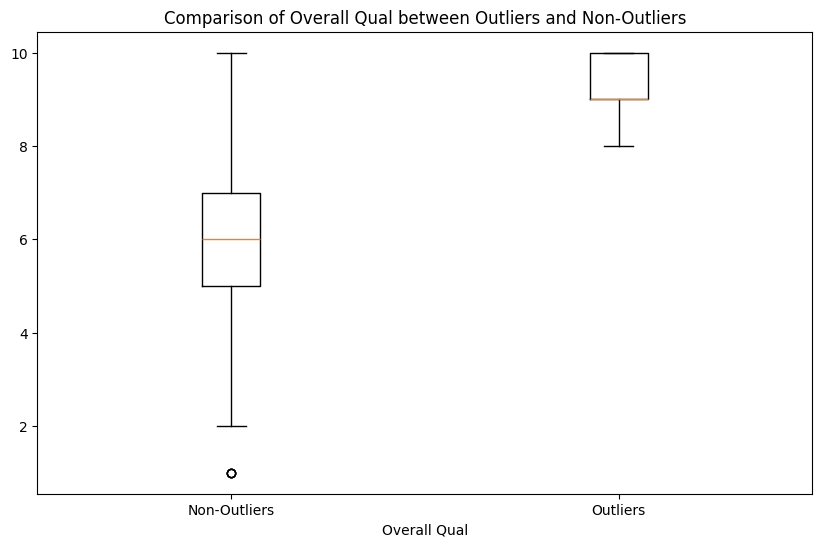

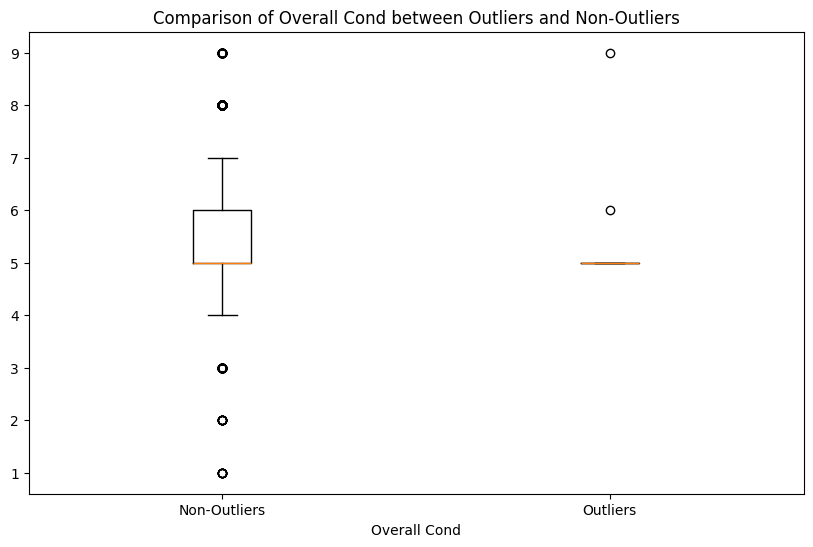

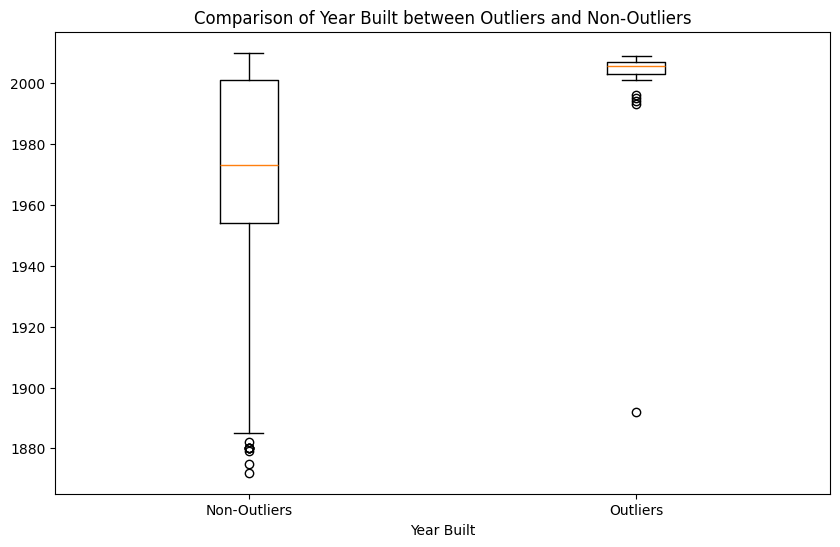

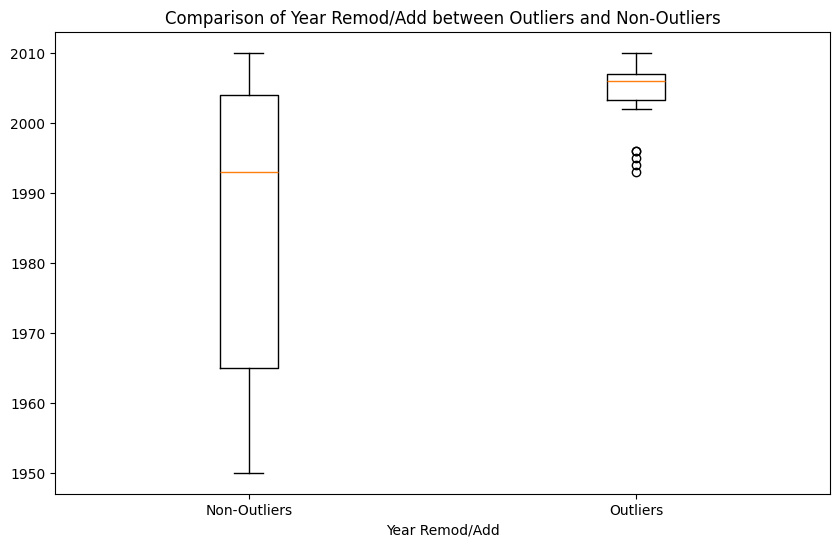

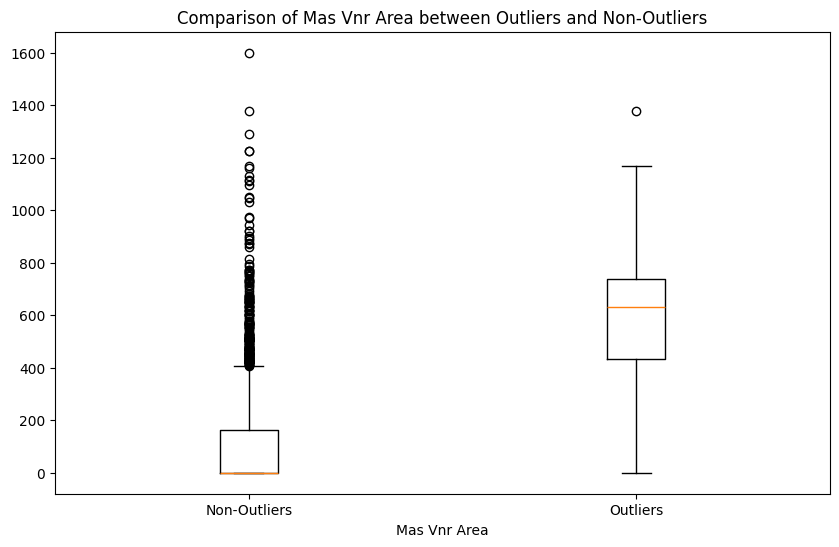

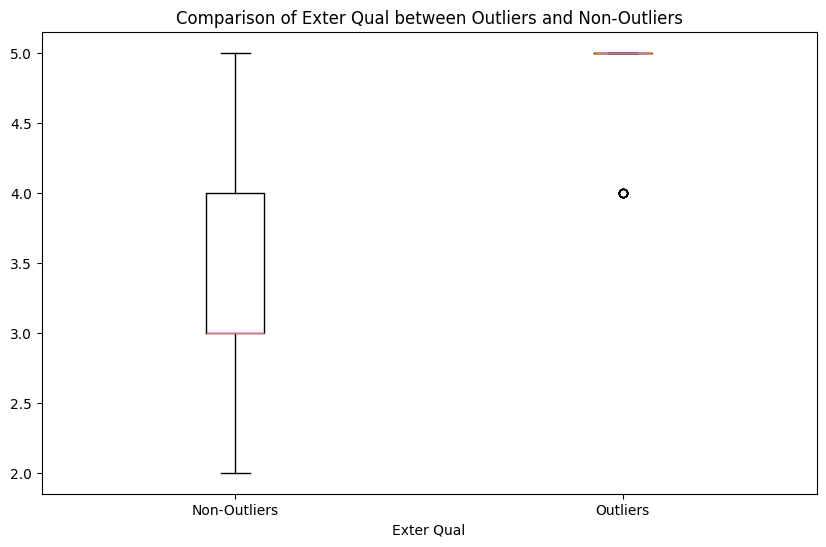

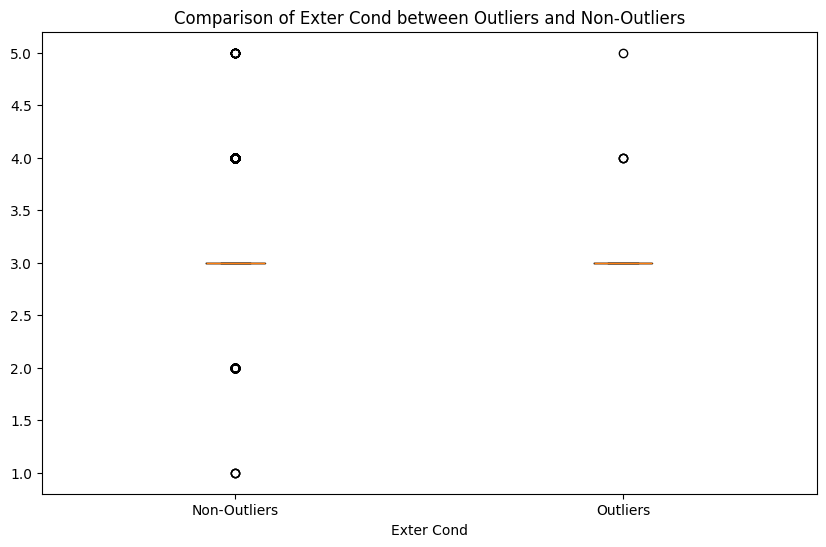

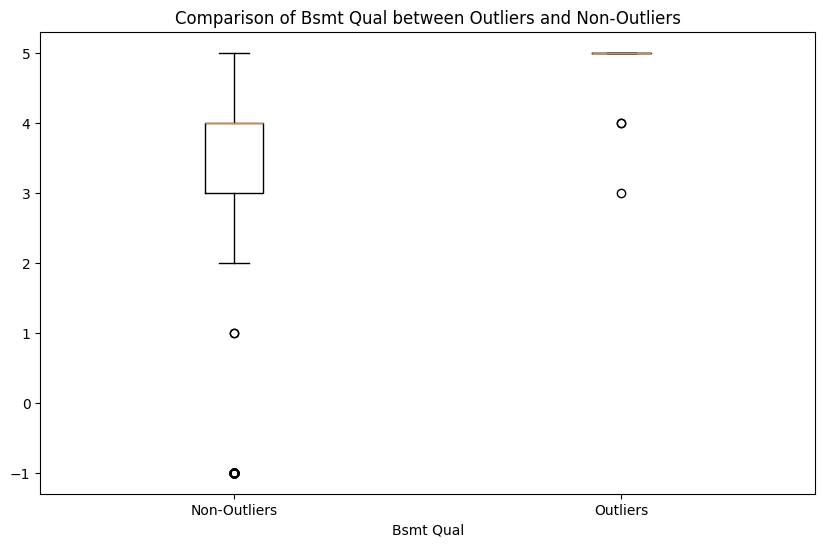

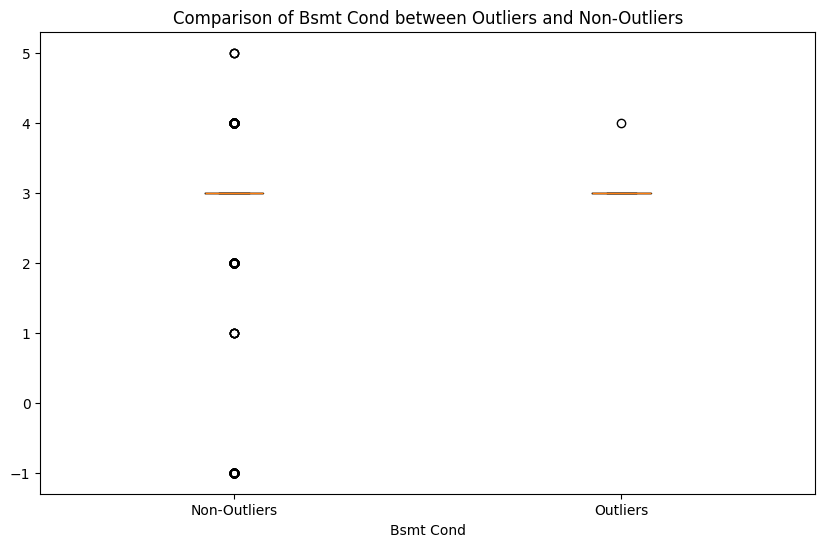

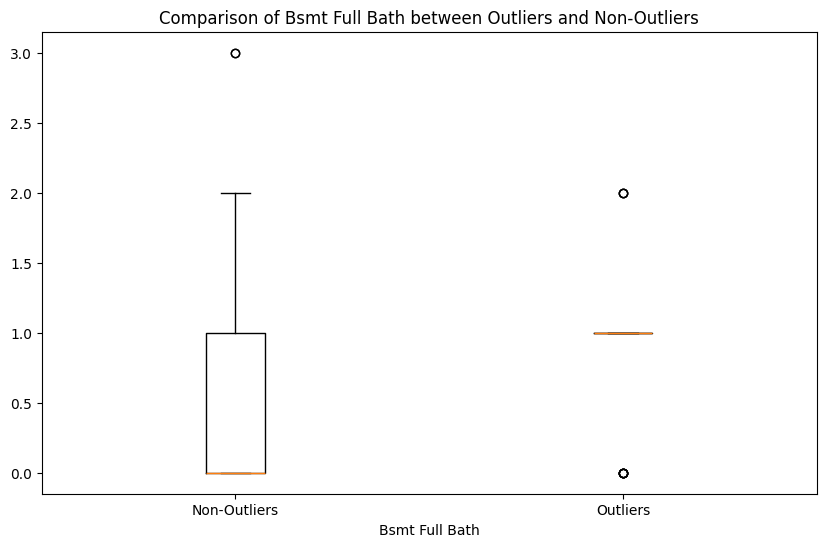

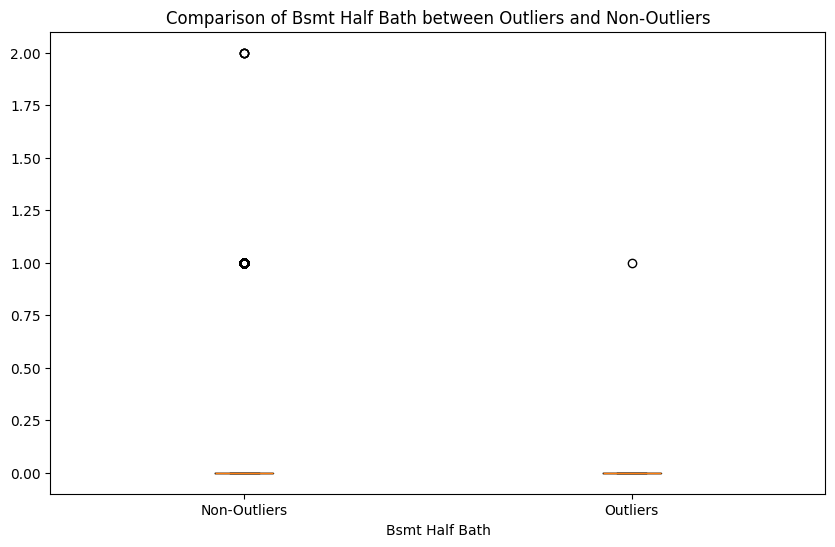

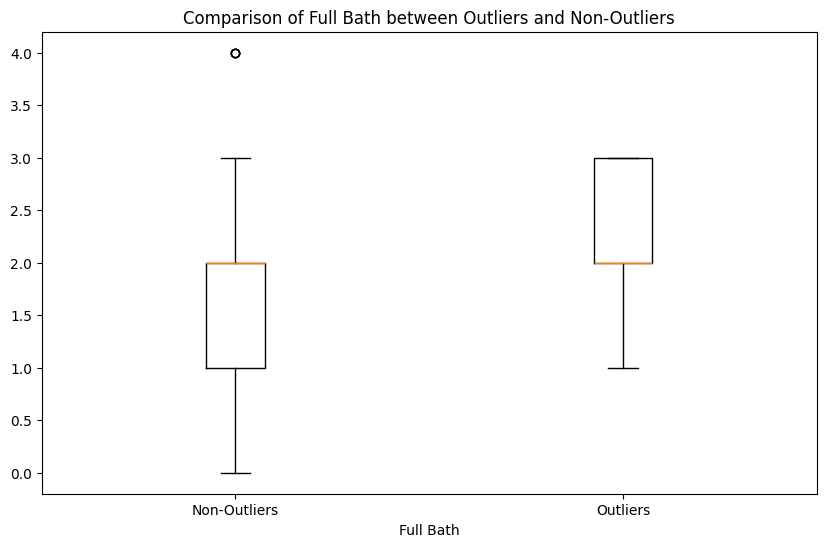

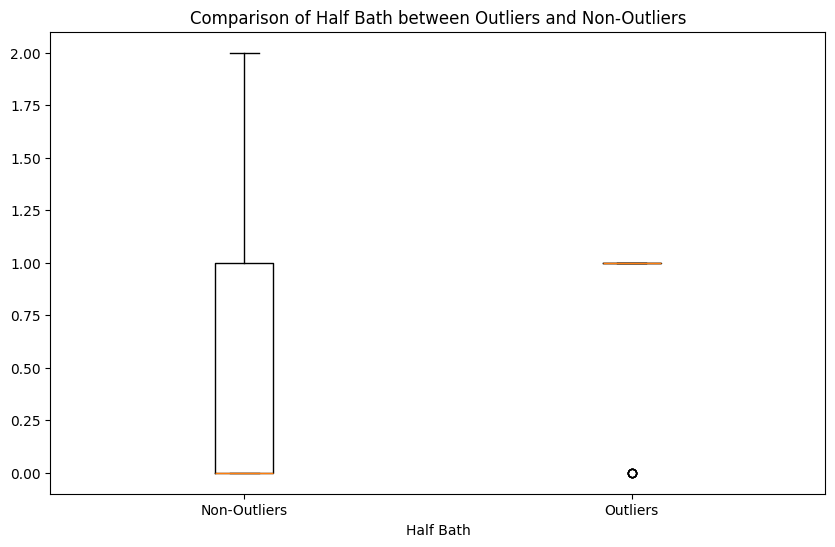

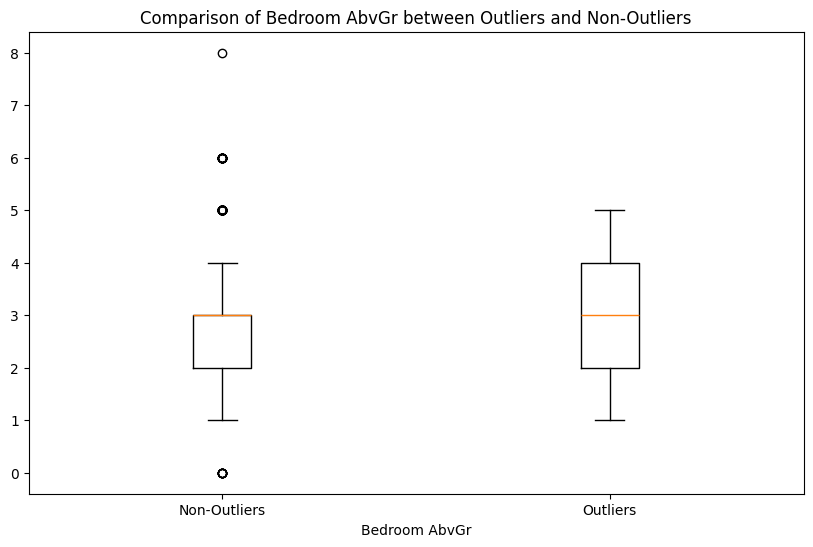

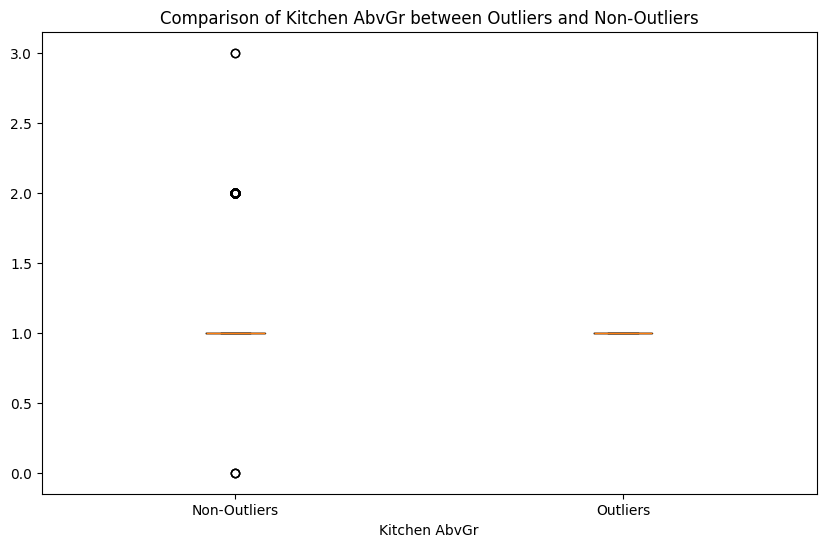

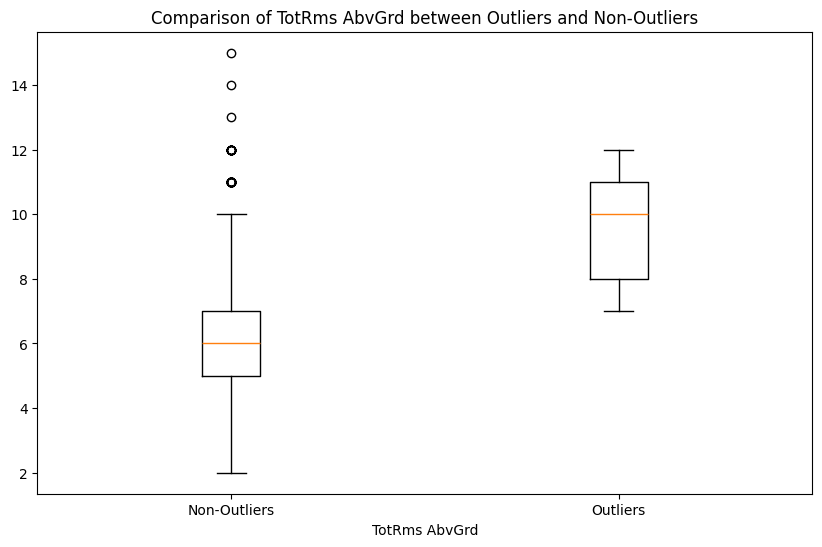

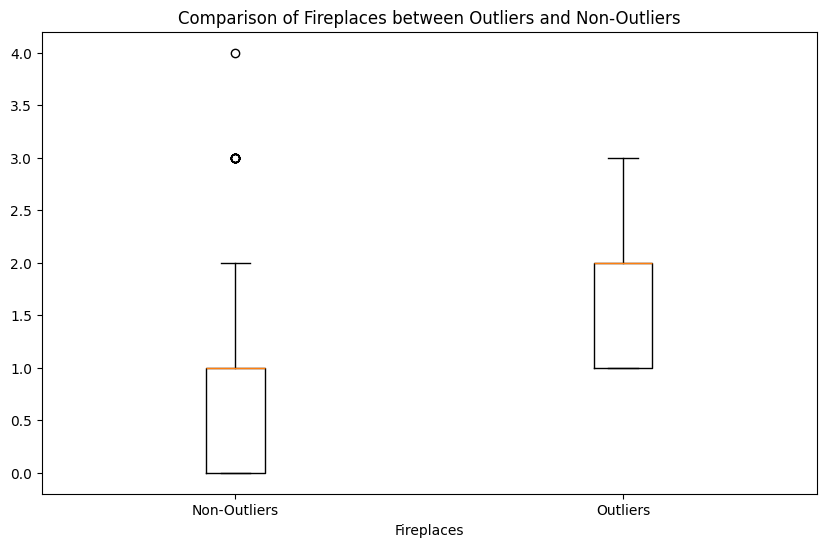

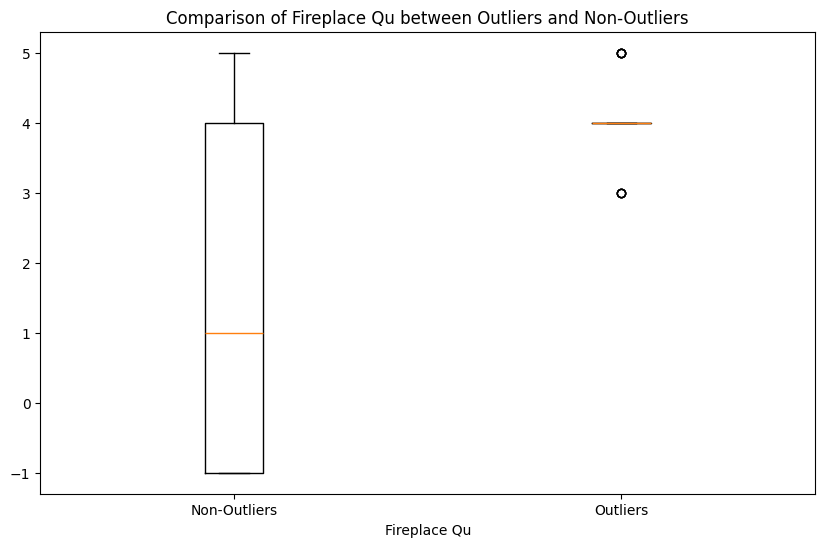

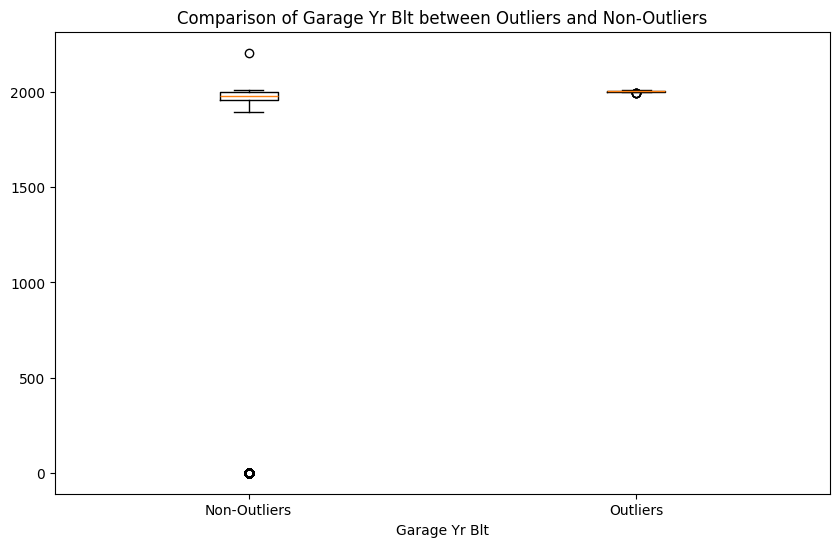

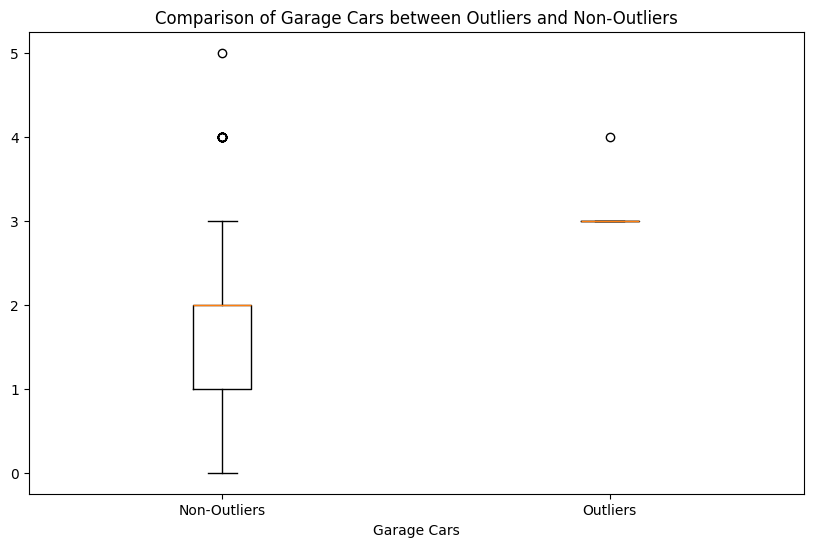

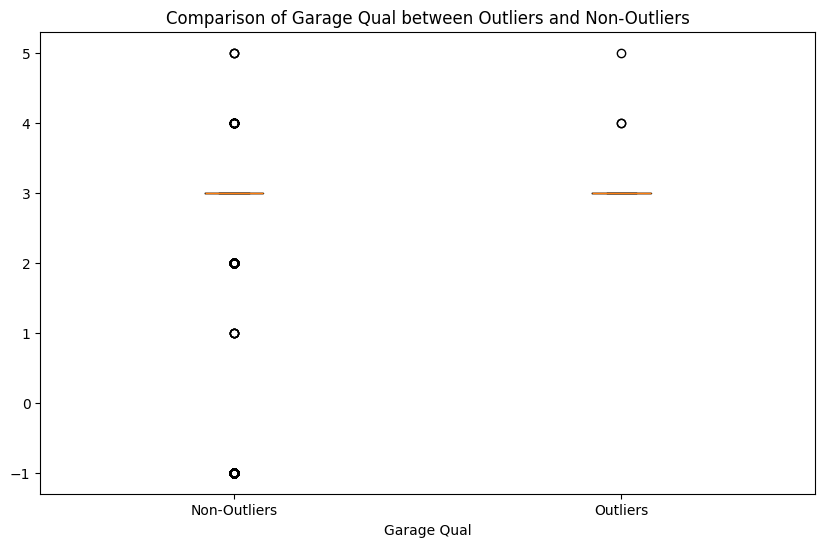

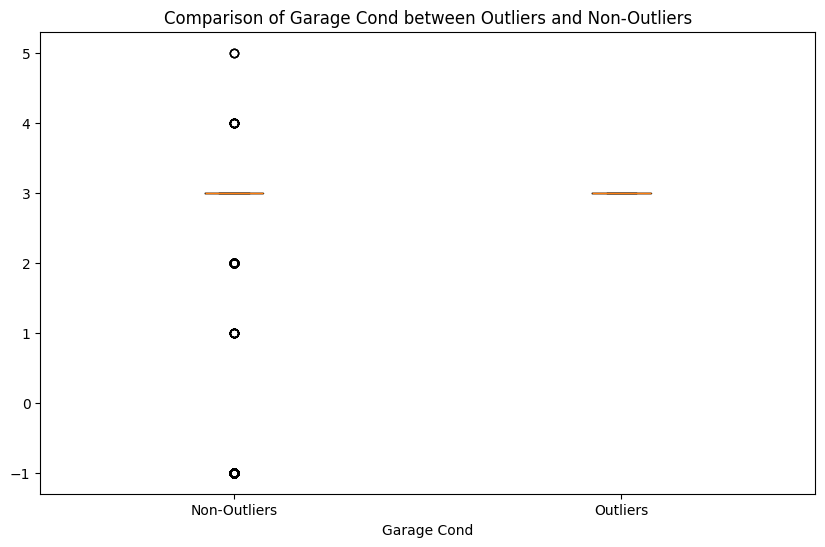

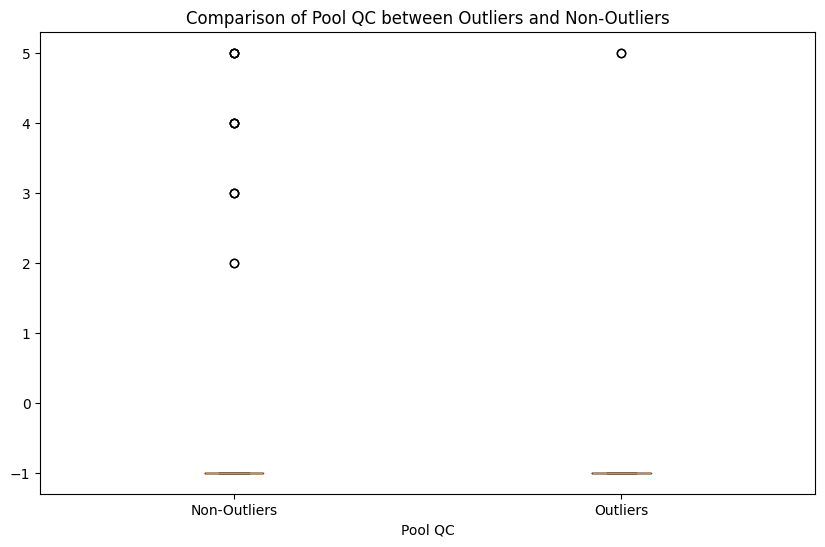

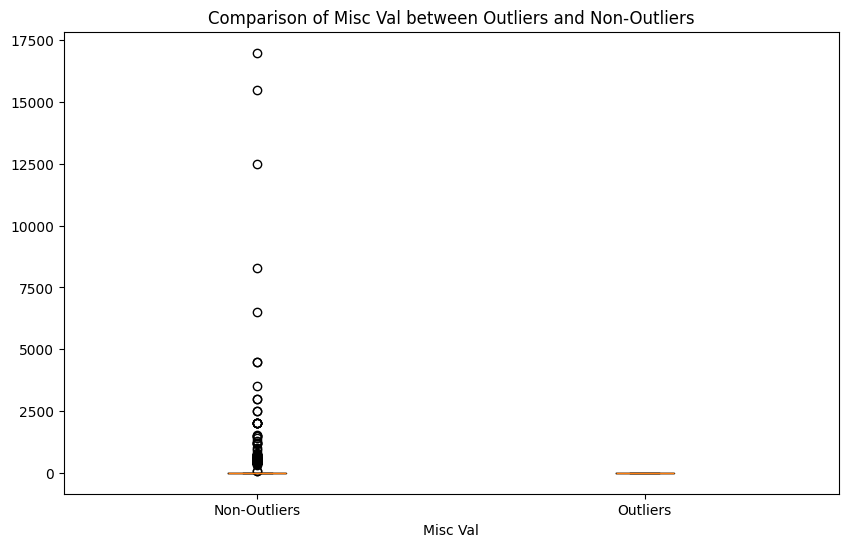

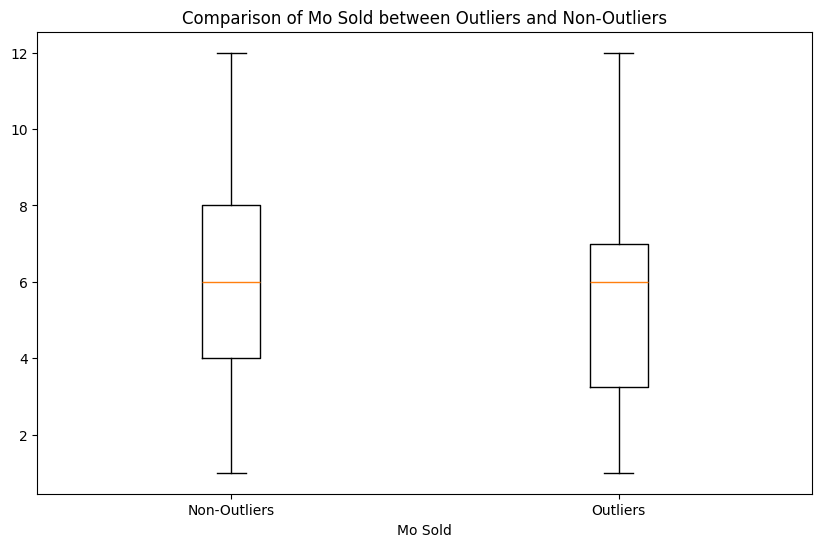

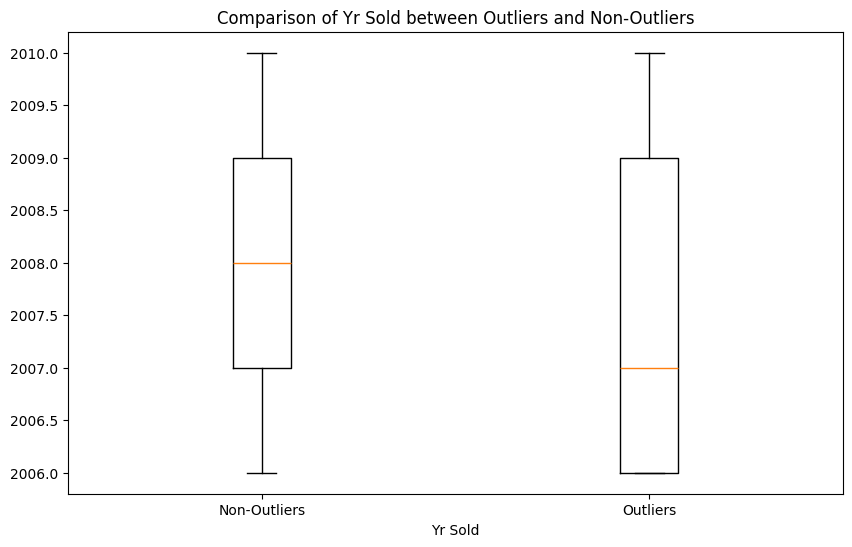

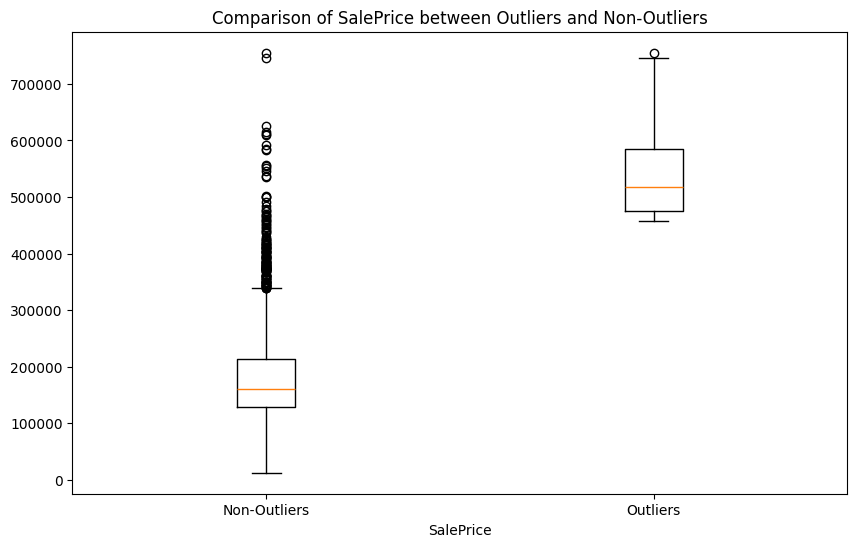

In [32]:
# Re-visualize and compare all features between outliers and non-outliers
for feature in _02_Feature_Engineering.df_combined.columns:
    if _02_Feature_Engineering.df_combined[feature].dtype in [np.int64, np.float64]:  
        plt.figure(figsize=(10, 6))
        plt.boxplot([_02_Feature_Engineering.df_combined[feature], sp_outliers[feature]], labels=['Non-Outliers', 'Outliers'])
        plt.title(f'Comparison of {feature} between Outliers and Non-Outliers')
        plt.xlabel(feature)
        plt.show()


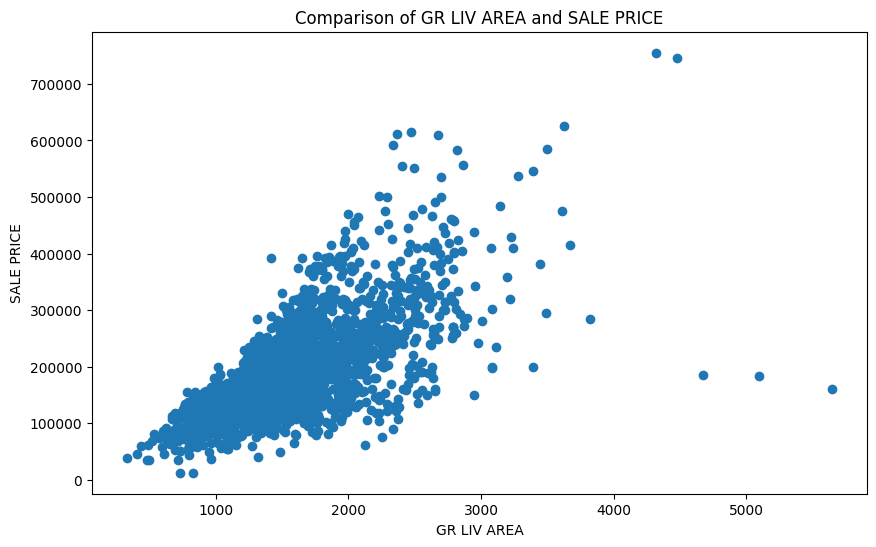

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(df['Gr Liv Area'], df['SalePrice'])

plt.title('Comparison of GR LIV AREA and SALE PRICE')
plt.xlabel('GR LIV AREA')
plt.ylabel('SALE PRICE')

plt.show()
